In [3]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
import os
import torch.nn.functional as F
import cv2
import numpy as np
import torch.utils.data as Data
if not os.path.exists('./dc_img'):
    os.mkdir('./dc_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 1000
learning_rate = 1e-3

img_transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
data1 = cv2.imread('pos1_28x28.png')
data2= cv2.imread('pos2_28x28.png')

result = np.repeat(data1[np.newaxis,...], 60000, axis=0)
print(result.shape)
y0 = result.astype('float32')




result1 = np.repeat(data2[np.newaxis,...], 60000, axis=0)
y1 = result1.astype('float32')


y0 = np.transpose(y0, (0, 3, 2, 1))# This to make channels first for CNN
y1 = np.transpose(y1, (0, 3, 2, 1)) 


print(y0.shape)

x = torch.from_numpy(y0)
y = torch.from_numpy(y1)



torch_dataset = Data.TensorDataset(x,y)


loader = Data.DataLoader(

    dataset=torch_dataset,

    batch_size=250,

    shuffle=True,

    num_workers=0,

)

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
        )

    def forward(self, x):
        x = self.encoder(x)
        return x

class auto_decoder(nn.Module):
    def __init__(self):
        super(auto_decoder,self).__init__()
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 3,padding=1)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 3,padding=1)
        
    def forward(self, x):
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
                
        return x
    

model = autoencoder()


def h_score(fx, gy):
 
    fx = fx - fx.mean(0)

    gy = gy - gy.mean(0)

    Nsamples = fx.size(0)

    covf = torch.matmul((fx.permute(0, 1,3,2)), fx) / Nsamples

    covg = torch.matmul((gy.permute(0, 1,3,2)), (gy)) / Nsamples

    h = -2 * torch.mean((fx * gy).sum(1)) + (covf * covg).sum()

    return h

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

model_1 = auto_decoder()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=learning_rate,
                             weight_decay=1e-5)


for epoch in range(num_epochs):
    for x,y in loader:

        # ===================forward=====================
        #loss = criterion(output1, img)
        loss = h_score(model(x),model(y))
        # ===================backward====================
        optimizer.zero_grad()
        #optimizer_1.zero_grad()
        loss.backward()
        optimizer.step()
        #optimizer_1.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.item()))


torch.save(model.state_dict(), './conv_autoencoder.pth')

(60000, 28, 28, 3)
(60000, 3, 28, 28)
epoch [1/100], loss:0.0000
epoch [2/100], loss:0.0000
epoch [3/100], loss:0.0000
epoch [4/100], loss:0.0000
epoch [5/100], loss:0.0000
epoch [6/100], loss:0.0000
epoch [7/100], loss:0.0000
epoch [8/100], loss:0.0000
epoch [9/100], loss:0.0000
epoch [10/100], loss:0.0000
epoch [11/100], loss:0.0000
epoch [12/100], loss:0.0000
epoch [13/100], loss:0.0000
epoch [14/100], loss:0.0000
epoch [15/100], loss:0.0000
epoch [16/100], loss:0.0000
epoch [17/100], loss:0.0000
epoch [18/100], loss:0.0000
epoch [19/100], loss:0.0000
epoch [20/100], loss:0.0000
epoch [21/100], loss:0.0000
epoch [22/100], loss:0.0000
epoch [23/100], loss:0.0000
epoch [24/100], loss:0.0000
epoch [25/100], loss:0.0000
epoch [26/100], loss:0.0000
epoch [27/100], loss:0.0000
epoch [28/100], loss:0.0000
epoch [29/100], loss:0.0000
epoch [30/100], loss:0.0000
epoch [31/100], loss:0.0000
epoch [32/100], loss:0.0000
epoch [33/100], loss:0.0000
epoch [34/100], loss:0.0000
epoch [35/100], los

In [6]:
blank = cv2.imread('blank_28x28.png')
b = blank.astype('float32')
b = torch.from_numpy(b)

for i in range(5):
    print("x: ", model(x[i].reshape(1,3,28,28)))
    print("y:", model(y[i].reshape(1,3,28,28)))

print("b:", model(b.reshape(1,3,28,28)))



x:  tensor([[[[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]],

         [[1.1843e-38, 1.1843e-38],
          [1.1843e-38, 1.1843e-38]],

         [[5.6856e-38, 5.6856e-38],
          [5.6856e-38, 5.6856e-38]],

         [[6.1938e-38, 6.1938e-38],
          [6.1938e-38, 6.1938e-38]],

         [[4.7946e-38, 4.7946e-38],
          [4.7946e-38, 4.7946e-38]],

         [[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]],

         [[2.1584e-38, 2.1584e-38],
          [2.1584e-38, 2.1584e-38]],

         [[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]]]], grad_fn=<MaxPool2DWithIndicesBackward>)
y: tensor([[[[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]],

         [[1.1843e-38, 1.1843e-38],
          [1.1843e-38, 1.1843e-38]],

         [[5.6856e-38, 5.6856e-38],
          [5.6856e-38, 5.6856e-38]],

         [[6.1938e-38, 6.1938e-38],
          [6.1938e-38, 6.1938e-38]],

         [[4.7946e-38, 4.7946e-38],
          [4.7946e-38, 4.794

TypeError: Invalid shape (4, 4, 2) for image data

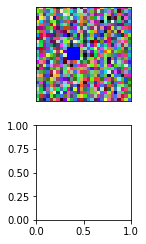

In [12]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    k = model(x[i].reshape(1,3,28,28)).reshape(4,4,2)
    #z = (model_1(k)).reshape(28, 28,3)
    plt.imshow(k.detach().numpy())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
print(np.shape(k))
plt.show()